# id by numbers
| $n_{0,{\bf r}}$ | $n^{{\bf r}'}_{\bf r} $        |  $ n^h_{{\bf r}}$|$ n^h_{0{\bf r}}$ | Linear | Connector |
|-----------------|--------------------------------|-------------------|-----------------|--------|-----------|
| $n^{\rm av}$    | $n^{\rm av}$                   | -sc  | $n^{\rm av}$ | lin1      | con1   | 
| $n^{\rm av}$    | $(n({\bf r}')+ n^{\rm av})/2 $ | sc| $n^{\rm av}$ | lin2 | con2                   |
| $n({\bf r})$    | $ (n^{\rm av}+n({\bf r})/2$    | sc| $n({\bf r})$  |lin3  | con3  |
| $n({\bf r}) $   | $ (n({\bf r}')+ n({\bf r}))/2$ | sc | $n({\bf r})$  |lin4 | con4 |
| $n({\bf r}) $   | $ n({\bf r})$                  | sc | $n({\bf r})$ |lin5 | con5|
| $n^M$           | $(n^{\rm av}+n^M)/2$           | sc |$n^M$ |lin6 | con6|
| $n^M$           | $(n({\bf r}')+n^M)/2$          | sc | $n^M$ |lin7  | con7 | 
| $n^M$           | $n^M$                          |  sc| $n^M$|lin8 | con8| 



- Linear approx: 
    $$ v_{xc}({\bf r};[n]) \approx  	v_{\rm xc}^h(n_{0,{\bf r}}) + \int d {\bf r}'   (n({\bf r}')-n_{0,{\bf r}})f_{\rm xc}(|{\bf r}-{\bf r}'|; n_{\bf r}^{{\bf r}'} ) $$ 

- connector approx if sc=1: 
$$ n^{c,{\rm approx}}_{\mathbf{r}}([n])= \frac {1}{f_{\rm xc}^h( n^h_{0{\bf r}})} \int d\mathbf{r}' n(\mathbf{r}') f_{\rm xc}(|\mathbf{r}-\mathbf{r}'|; n_{\bf r}^{{\bf r}'} ) $$


- Connector approx is sc>1: 
$$ n^{c,{\rm approx}}_{\mathbf{r}}([n])= \frac {1}{f_{\rm xc}^h( n^h_{{\bf r}})} \int d\mathbf{r}' n(\mathbf{r}') f_{\rm xc}(|\mathbf{r}-\mathbf{r}'|; n_{\bf r}^{{\bf r}'} ) $$
$$ n^h_{{\bf r}}=\frac{n_{0,{\bf r}} + n^{c,{\rm approx}}_{\mathbf{r}}([n])}{2} $$


In [77]:
from quick_analyzer import * 


# Si 

In [2]:
# update results 
#! rsync -av --delete ara:/home/me36sin/fxc_conn_article/Si/calculations/updated_version/all_tab-con/*con*.npz . 
#! rsync -av --delete ara:/home/me36sin/fxc_conn_article/Si/calculations/updated_version/all_tab-lin/*lin*.npz . 


In [3]:
si_analyse = analyzer(mat="si", qmc_file="si_qmc_dens_vxc.csv")

In [9]:
si_analyse.dict["LDA"]= {"dens": np.genfromtxt("dens_ref_lda.dat") , "direct_gap":2.55 , "vxc": np.genfromtxt("vxc_ref_lda.dat") , "residu":0. }

In [ ]:
for i in range(1,9):
    for sc in [1,3,18]:  
        try: si_analyse.add_to_dict_from_npz(f"si_lin{i}_sc{sc}.npz", label=f"lin{i}")
        except: pass 
        si_analyse.add_to_dict_from_npz(f"si_con{i}_sc{sc}.npz", label=f"con{i}_sc{sc}")
    

list(si_analyse.dict.keys())

## Density error along the route 

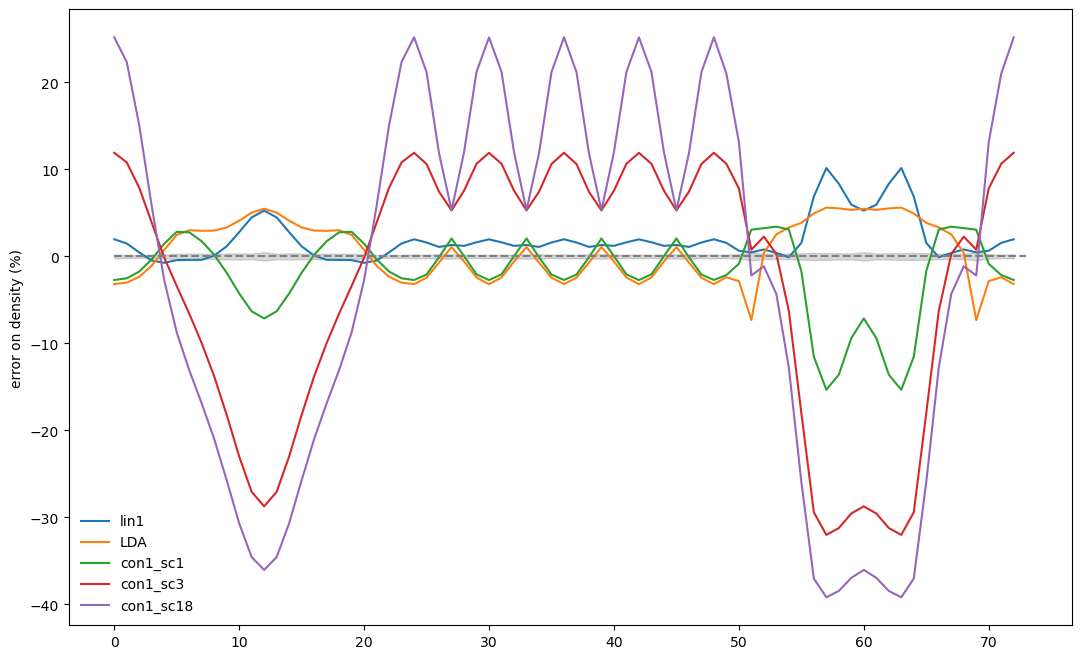

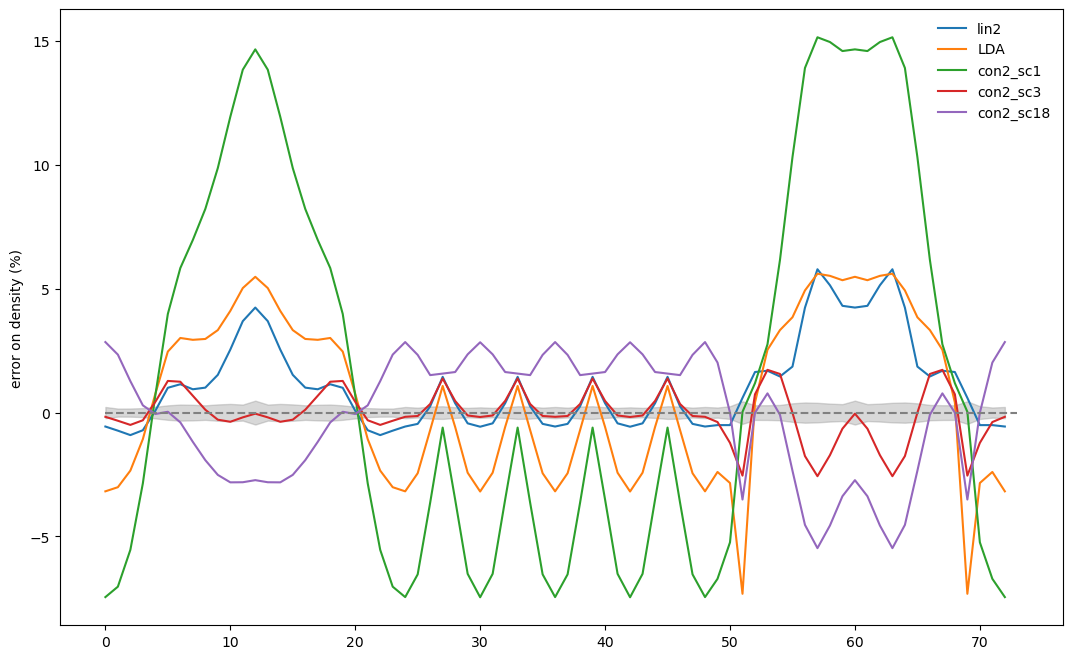

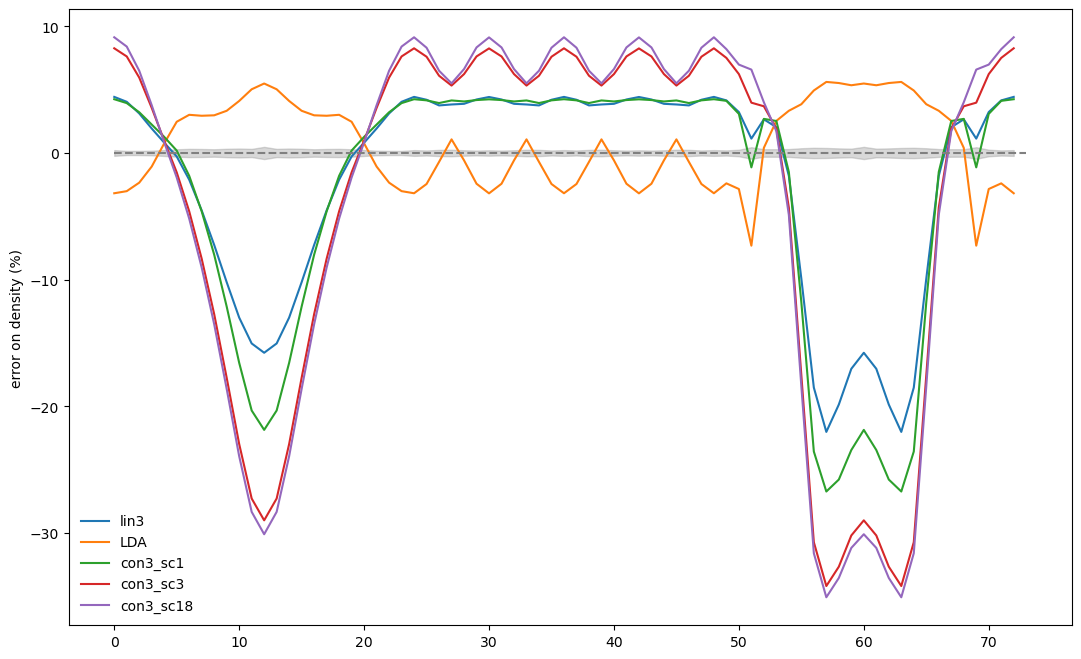

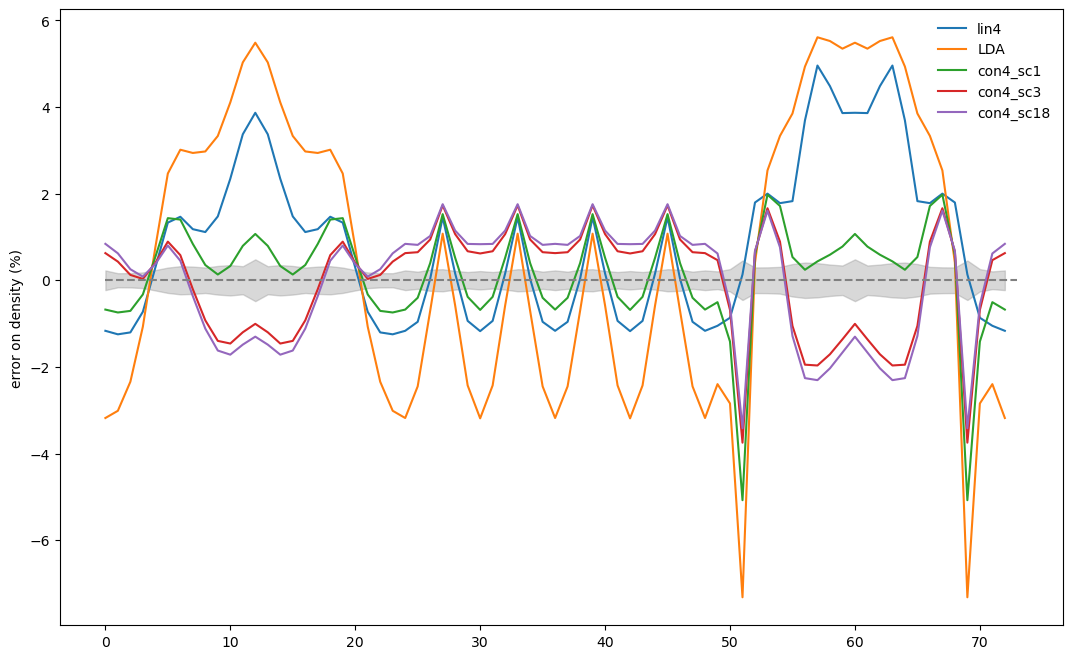

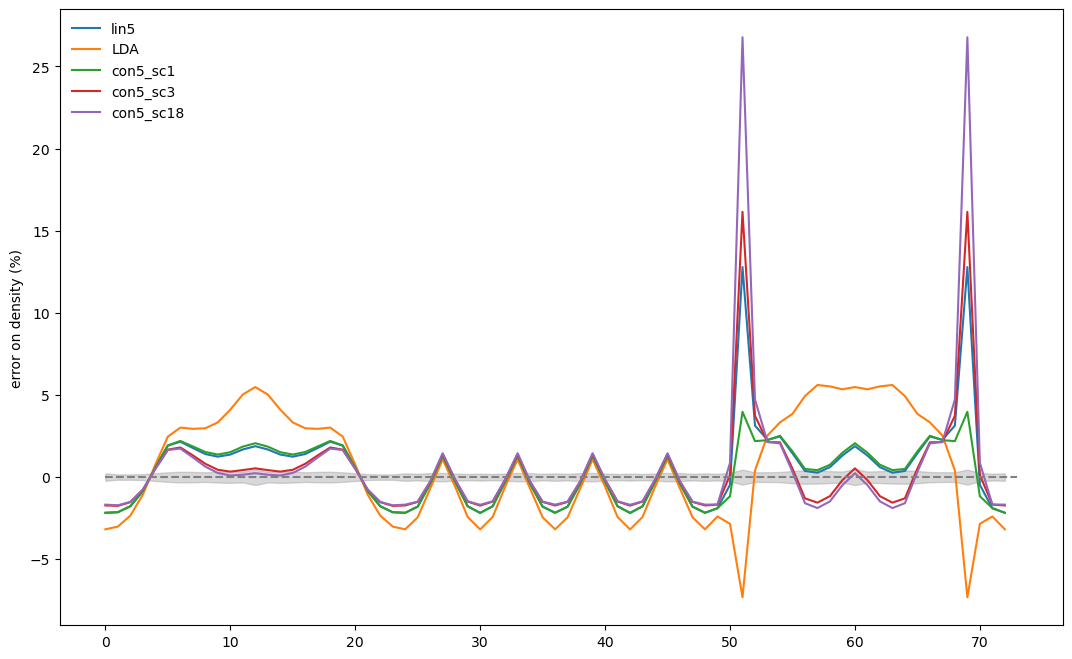

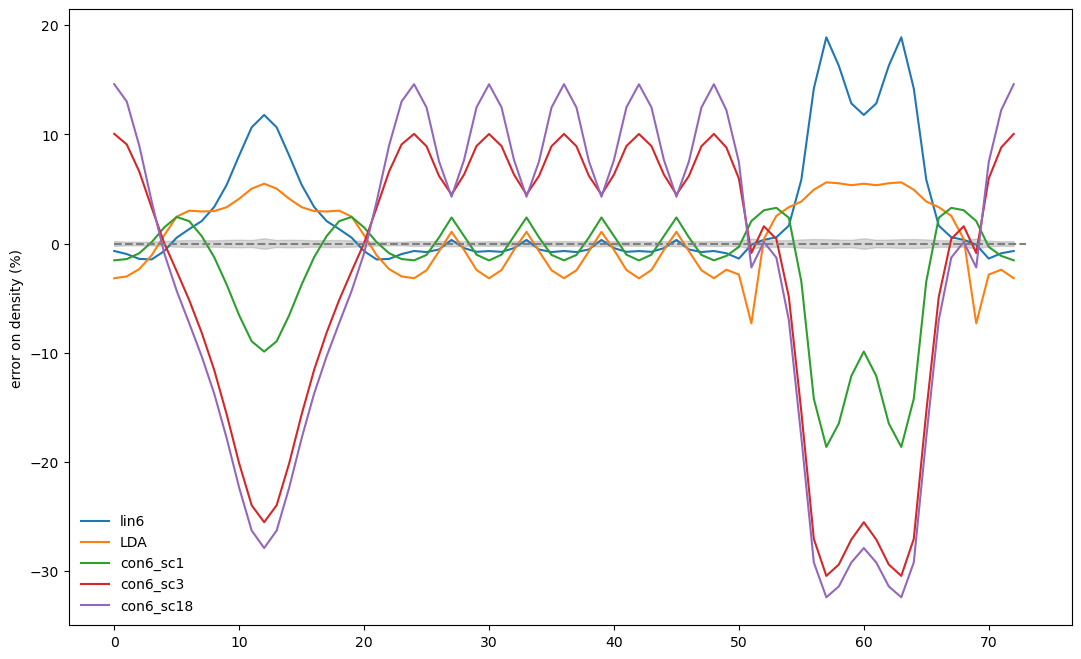

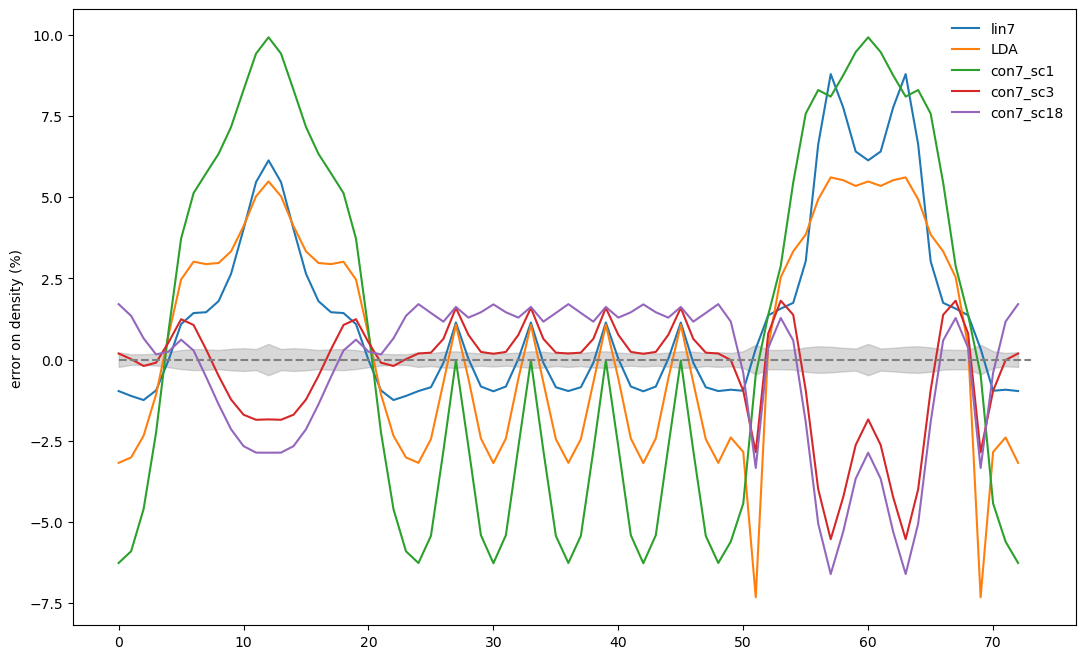

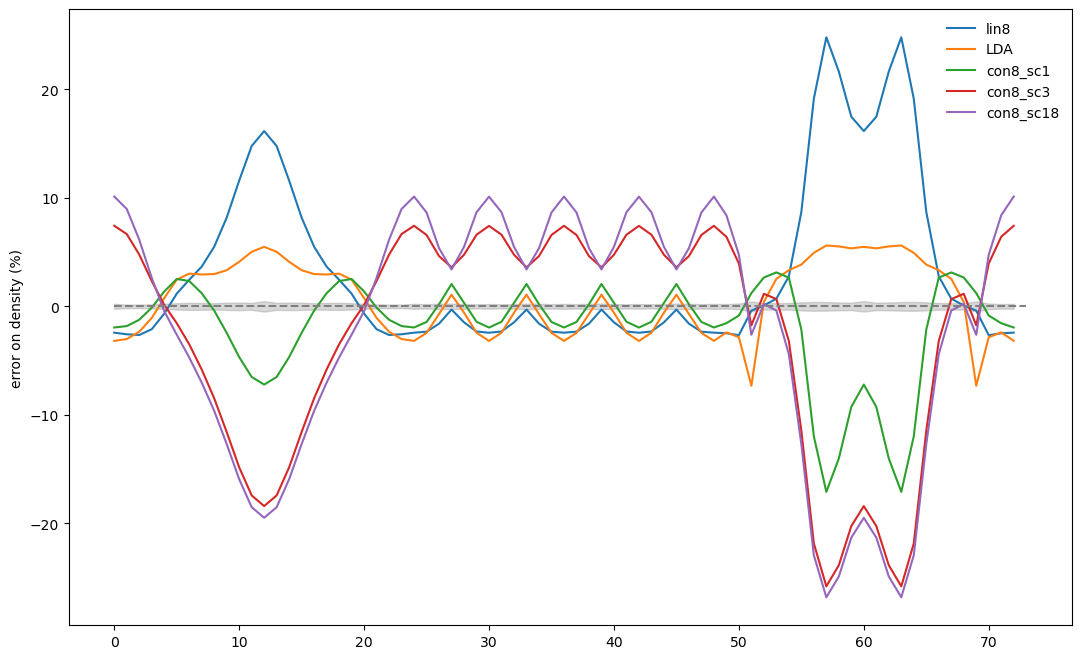

In [6]:
for i in range(1,9):
    plt.figure(figsize=(8*1.618,8))
    si_analyse.plot_diff_with_qmc([f"lin{i}","LDA", f"con{i}_sc1",f"con{i}_sc3",f"con{i}_sc18"])

## KS direct band gap 

In [10]:
si_analyse.get_stat() 
###
##
si_analyse.dens_vxc_error_data.loc[:,"type"]= [d[:3] for d in si_analyse.dens_vxc_error_data.index ]
si_analyse.direct_gaps_data.loc[:,"type"]= [d[:3] for d in si_analyse.direct_gaps_data.index ]
###
for key in si_analyse.dens_vxc_error_data.index : 
    si_analyse.direct_gaps_data.loc[key,"con wins"]= si_analyse.con_win(key, criterion="direct_gap") 
    si_analyse.direct_gaps_data.loc[key,["n0,r", "nrr'", "nhr_0" ]]= si_analyse.con_id(key) 
    si_analyse.direct_gaps_data.loc[key,"conv_last_it"]= si_analyse.dict[key]["residu"] 

    #### Same for dens_vxc data ### 
    si_analyse.dens_vxc_error_data.loc[key,"con wins"]= si_analyse.con_win(key, criterion="density MaxARE(%)") 
    si_analyse.dens_vxc_error_data.loc[key,["n0,r", "nrr'", "nhr_0" ]]= si_analyse.con_id(key)
    si_analyse.dens_vxc_error_data.loc[key,"conv_last_it"]= si_analyse.dict[key]["residu"] 

###
si_analyse.direct_gaps_data.sort_values("Relative error (%)")

,Direct KS Gap (ev),Relative error (%),type,con wins,"n0,r",nrr',nhr_0,conv_last_it
con4_sc3,2.734464,0.531755,con,True,n(r),(n(r')+n(r))/2,n(r),8.329222e-12
con7_sc3,2.699317,0.760410,con,True,n_M,(n(r')+n_M)/2,n_M,2.445381e-11
con4_sc18,2.744388,0.896630,con,True,n(r),(n(r')+n(r))/2,n(r),1.645004e-17
con2_sc3,2.683594,1.338442,con,True,n_av,(n(r')+n_av)/2,n_av,2.249705e-11
lin2,2.680077,1.467759,lin,None,n_av,(n(r')+n_av)/2,n_av,1.600897e-17
con7_sc18,2.765634,1.677728,con,True,n_M,(n(r')+n_M)/2,n_M,4.148178e-17
lin6,2.673908,1.694557,lin,None,n_M,(n_av+n_M)/2,n_M,2.191993e-17
con4_sc1,2.672329,1.752627,con,True,n(r),(n(r')+n(r))/2,n(r),1.875864e-17
lin7,2.659588,2.221044,lin,None,n_M,(n(r')+n_M)/2,n_M,2.265863e-17
lin4,2.652349,2.487182,lin,None,n(r),(n(r')+n(r))/2,n(r),2.408234e-17


In [11]:
si_analyse.dens_vxc_error_data.sort_values("density MaxARE(%)")

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type,con wins,"n0,r",nrr',nhr_0,conv_last_it
con2_sc3,0.655304,2.677106,2.134488,9.713088,con,True,n_av,(n(r')+n_av)/2,n_av,2.249705e-11
con4_sc18,1.174891,3.414914,2.583668,14.253281,con,True,n(r),(n(r')+n(r))/2,n(r),1.645004e-17
con4_sc3,1.066407,3.748378,2.517665,21.121912,con,True,n(r),(n(r')+n(r))/2,n(r),8.329222e-12
con5_sc1,0.892951,3.973499,3.073661,33.595288,con,True,n(r),n(r),n(r),3.290047e-17
con4_sc1,0.539704,5.076031,2.314516,34.342437,con,True,n(r),(n(r')+n(r))/2,n(r),1.875864e-17
lin4,0.993922,5.088436,2.758641,15.849763,lin,None,n(r),(n(r')+n(r))/2,n(r),2.408234e-17
con7_sc3,1.087670,5.529501,2.699489,17.102637,con,True,n_M,(n(r')+n_M)/2,n_M,2.445381e-11
con2_sc18,1.724976,5.559587,2.855159,11.033152,con,True,n_av,(n(r')+n_av)/2,n_av,4.206624e-17
lin2,1.013095,5.877652,3.024428,19.078135,lin,None,n_av,(n(r')+n_av)/2,n_av,1.600897e-17
con7_sc18,1.527746,6.601462,3.015202,17.922289,con,True,n_M,(n(r')+n_M)/2,n_M,4.148178e-17


Text(0, 0.5, 'direct gap relative error (%)')

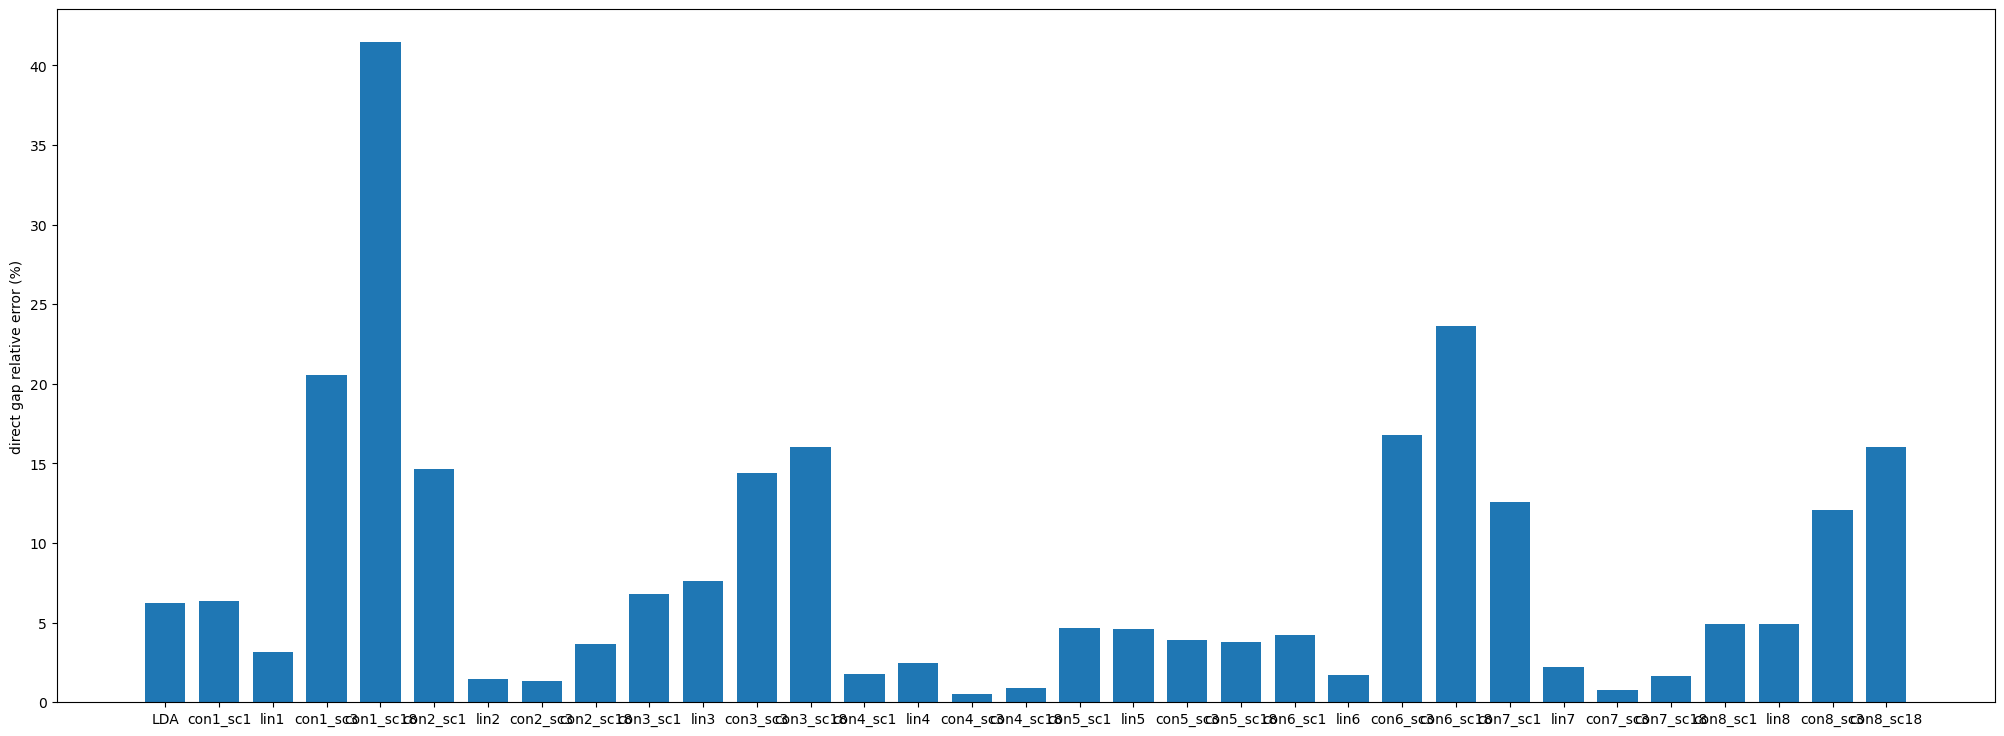

In [12]:
plt.figure(figsize=(25,9))
plt.bar(si_analyse.direct_gaps_data.index,si_analyse.direct_gaps_data["Relative error (%)"], width=0.75)
plt.ylabel("direct gap relative error (%)")

## Error table 

In [13]:
si_analyse.dens_vxc_error_data.sort_values("density MaxARE(%)")

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type,con wins,"n0,r",nrr',nhr_0,conv_last_it
con2_sc3,0.655304,2.677106,2.134488,9.713088,con,True,n_av,(n(r')+n_av)/2,n_av,2.249705e-11
con4_sc18,1.174891,3.414914,2.583668,14.253281,con,True,n(r),(n(r')+n(r))/2,n(r),1.645004e-17
con4_sc3,1.066407,3.748378,2.517665,21.121912,con,True,n(r),(n(r')+n(r))/2,n(r),8.329222e-12
con5_sc1,0.892951,3.973499,3.073661,33.595288,con,True,n(r),n(r),n(r),3.290047e-17
con4_sc1,0.539704,5.076031,2.314516,34.342437,con,True,n(r),(n(r')+n(r))/2,n(r),1.875864e-17
lin4,0.993922,5.088436,2.758641,15.849763,lin,None,n(r),(n(r')+n(r))/2,n(r),2.408234e-17
con7_sc3,1.087670,5.529501,2.699489,17.102637,con,True,n_M,(n(r')+n_M)/2,n_M,2.445381e-11
con2_sc18,1.724976,5.559587,2.855159,11.033152,con,True,n_av,(n(r')+n_av)/2,n_av,4.206624e-17
lin2,1.013095,5.877652,3.024428,19.078135,lin,None,n_av,(n(r')+n_av)/2,n_av,1.600897e-17
con7_sc18,1.527746,6.601462,3.015202,17.922289,con,True,n_M,(n(r')+n_M)/2,n_M,4.148178e-17


Text(0, 0.5, 'MeanARE(%)')

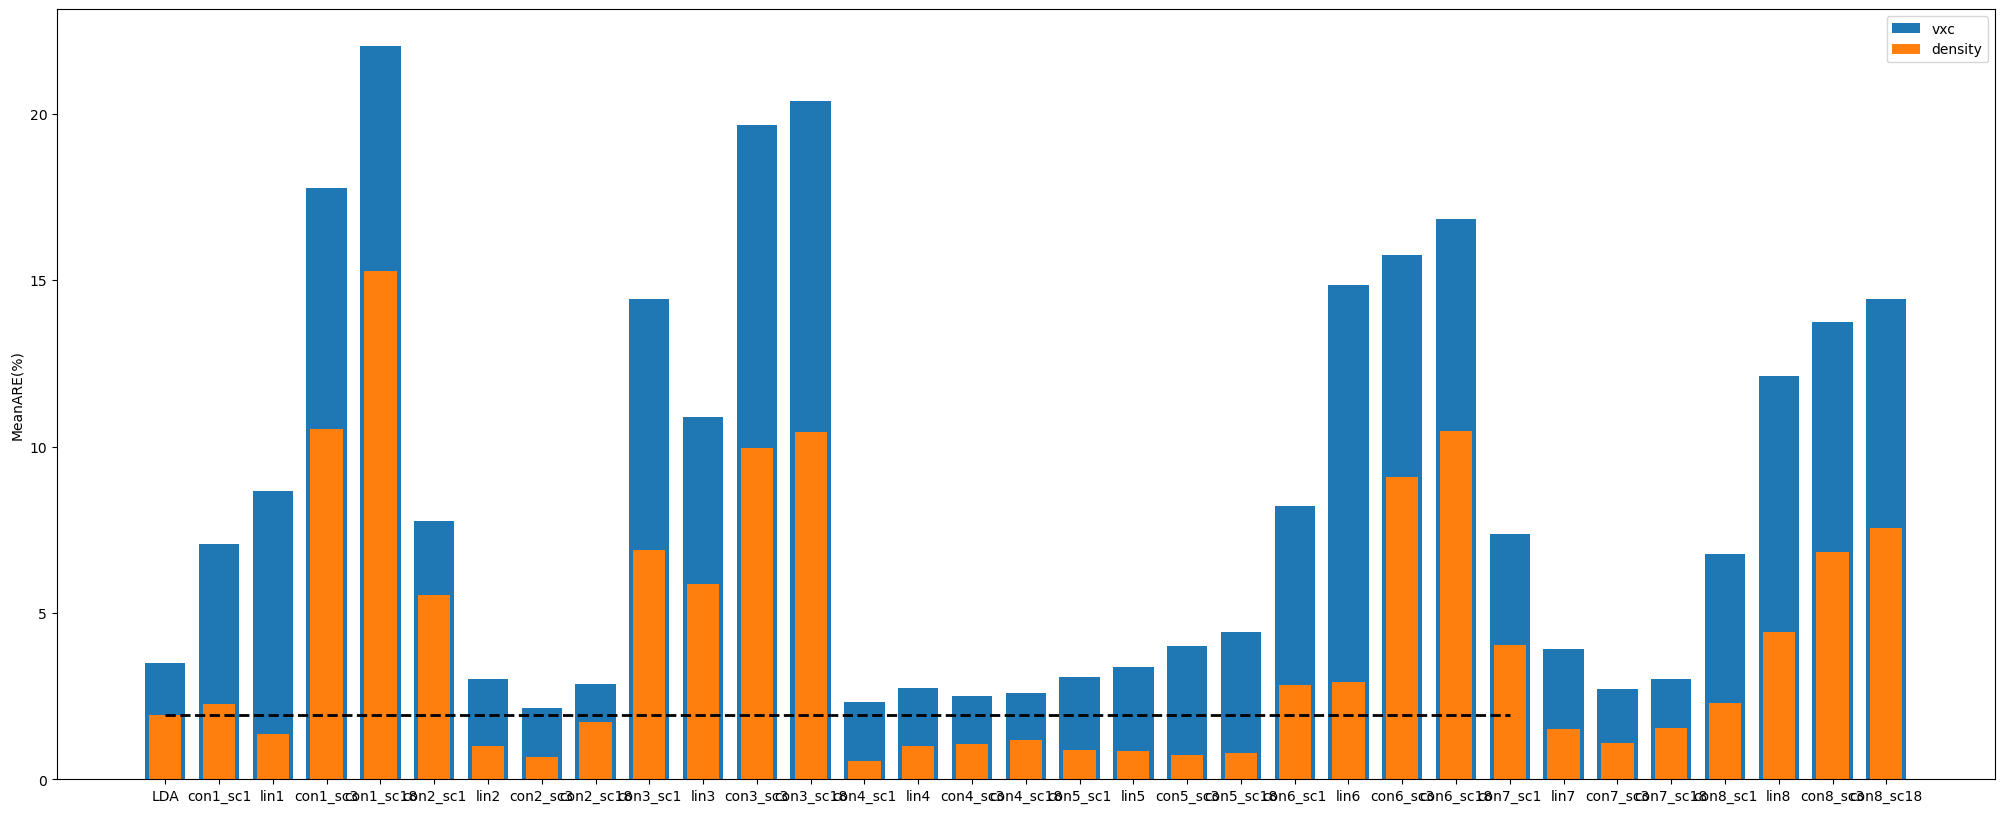

In [14]:
plt.figure(figsize=(25,10))
plt.bar(si_analyse.dens_vxc_error_data.index,si_analyse.dens_vxc_error_data["vxc MeanARE(%)"], width=0.75, label="vxc")
plt.bar(si_analyse.dens_vxc_error_data.index,si_analyse.dens_vxc_error_data["density MeanARE(%)"], width=0.6, label="density")
plt.hlines(si_analyse.dens_vxc_error_data.loc["LDA","density MeanARE(%)"],0,25, ls="dashed", color="black", lw=2)
plt.legend()
plt.ylabel("MeanARE(%)")

Text(0, 0.5, 'MaxARE(%)')

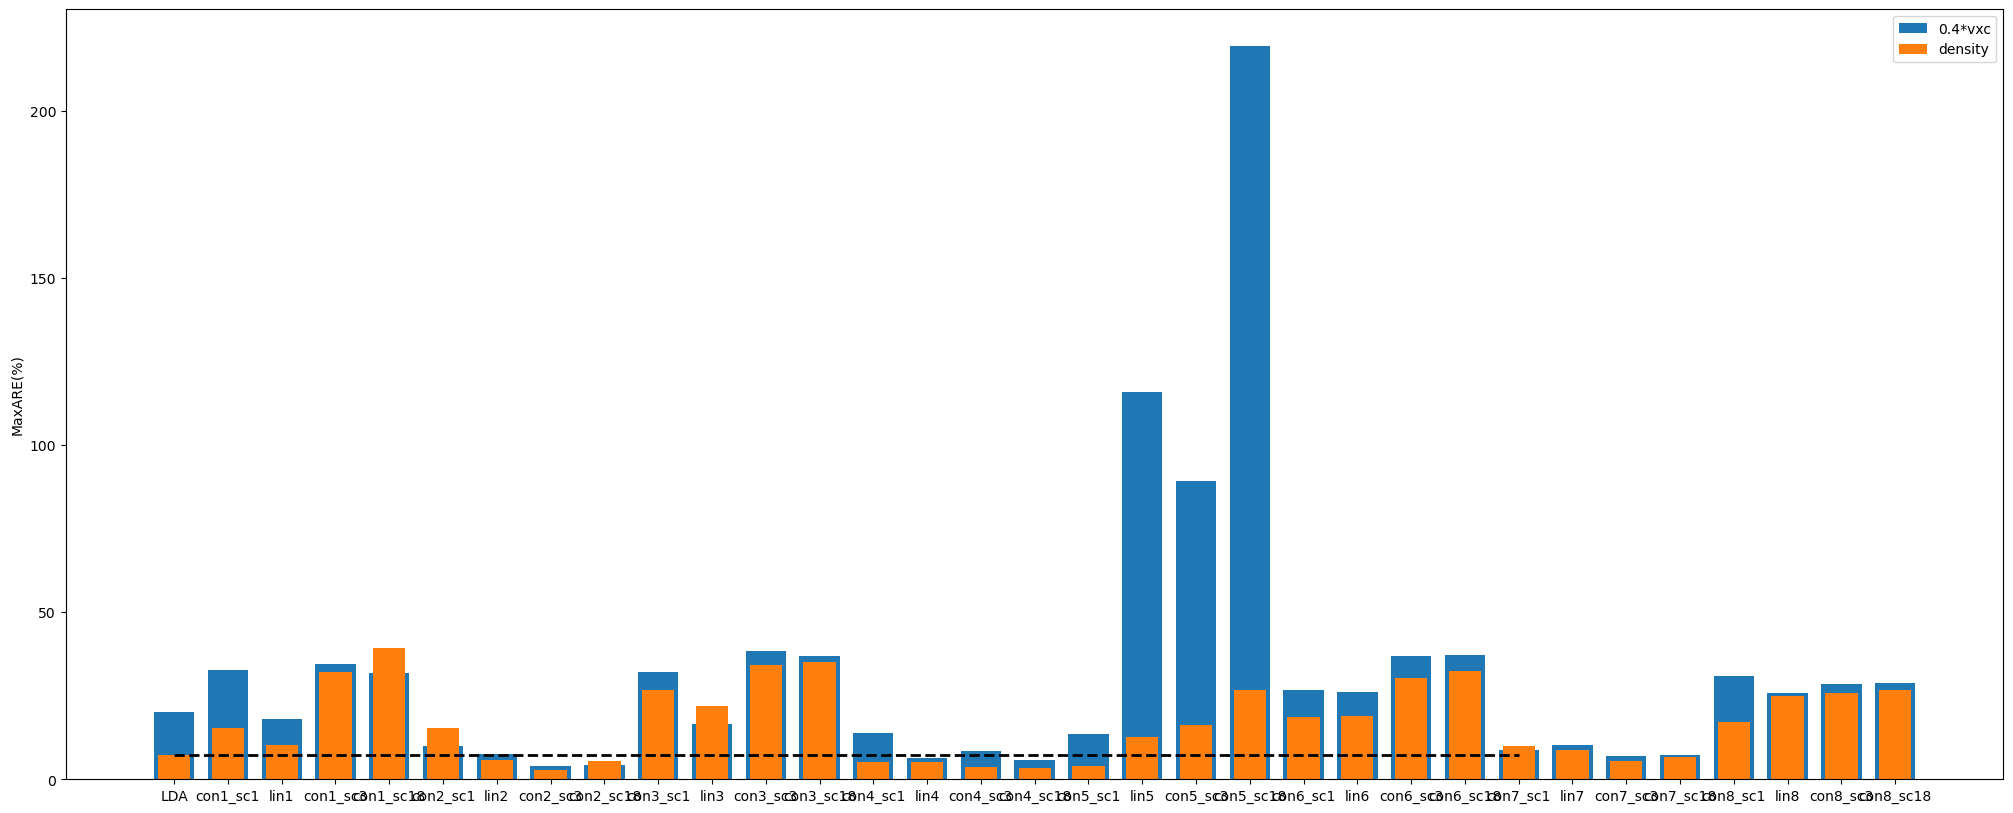

In [15]:
plt.figure(figsize=(25,10))

plt.bar(si_analyse.dens_vxc_error_data.index,0.4*si_analyse.dens_vxc_error_data["vxc MaxARE(%)"], width=0.75, label="0.4*vxc")
plt.bar(si_analyse.dens_vxc_error_data.index,si_analyse.dens_vxc_error_data["density MaxARE(%)"], width=0.6, label="density", color="C1")
plt.hlines(si_analyse.dens_vxc_error_data.loc["LDA","density MaxARE(%)"],0,25, ls="dashed", color="black", lw=2)

plt.legend()
plt.ylabel("MaxARE(%)")

In [16]:
si_analyse.dens_vxc_error_data.sort_values("vxc MaxARE(%)")[:7]

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type,con wins,"n0,r",nrr',nhr_0,conv_last_it
con2_sc3,0.655304,2.677106,2.134488,9.713088,con,True,n_av,(n(r')+n_av)/2,n_av,2.249705e-11
con2_sc18,1.724976,5.559587,2.855159,11.033152,con,True,n_av,(n(r')+n_av)/2,n_av,4.206624e-17
con4_sc18,1.174891,3.414914,2.583668,14.253281,con,True,n(r),(n(r')+n(r))/2,n(r),1.645004e-17
lin4,0.993922,5.088436,2.758641,15.849763,lin,None,n(r),(n(r')+n(r))/2,n(r),2.408234e-17
con7_sc3,1.087670,5.529501,2.699489,17.102637,con,True,n_M,(n(r')+n_M)/2,n_M,2.445381e-11
con7_sc18,1.527746,6.601462,3.015202,17.922289,con,True,n_M,(n(r')+n_M)/2,n_M,4.148178e-17
lin2,1.013095,5.877652,3.024428,19.078135,lin,None,n_av,(n(r')+n_av)/2,n_av,1.600897e-17


## Map density vxc 

/home/users/aouinanq/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


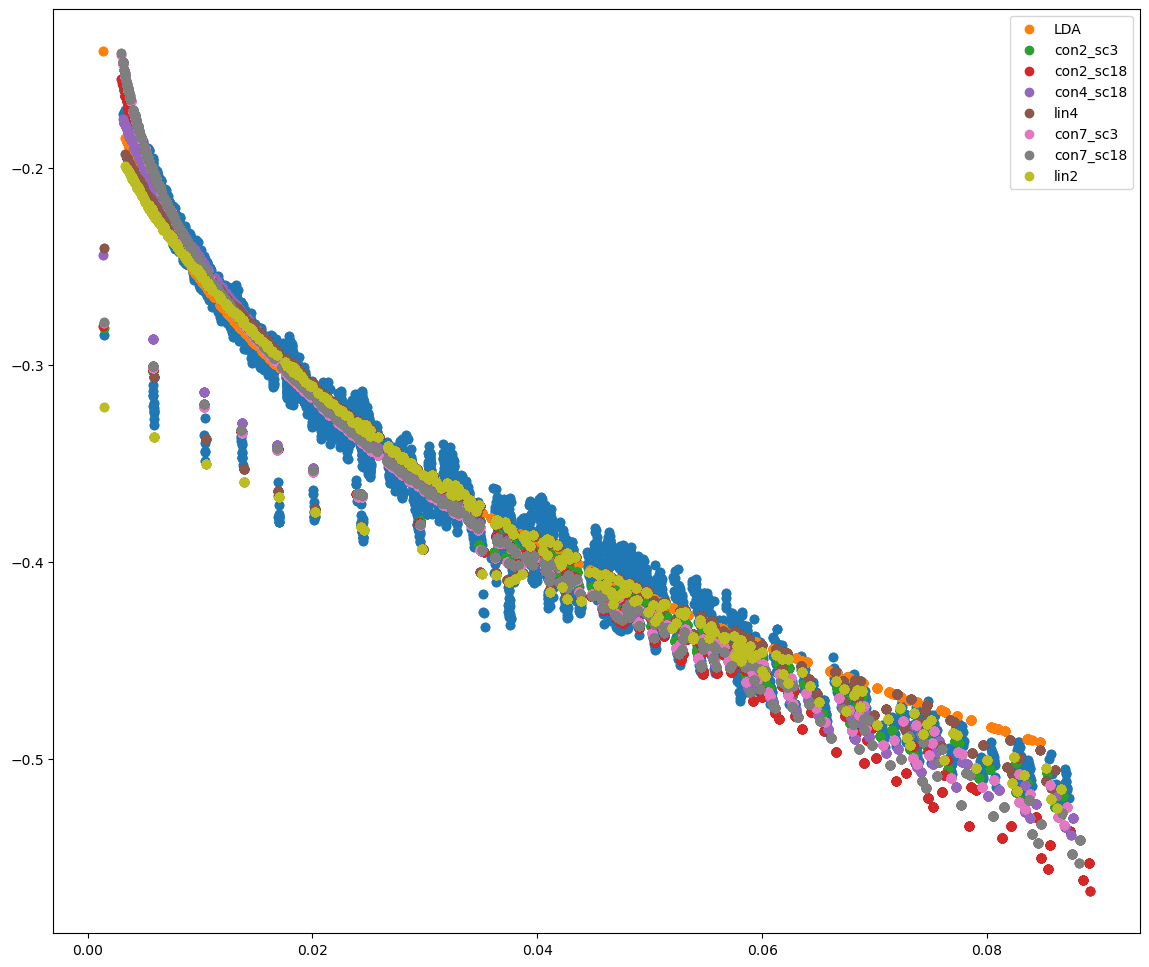

In [17]:
plt.figure(figsize=(12*1.168,12))
plt.scatter(si_analyse.newdens_QMC, si_analyse.vxc_qmc)
plt.scatter(si_analyse.dict["LDA"]["dens"], si_analyse.dict["LDA"]["vxc"], label="LDA") 
for func in si_analyse.dens_vxc_error_data.sort_values("vxc MaxARE(%)").index[:7]: 
    plt.scatter(si_analyse.dict[func]["dens"], si_analyse.dict[func]["vxc"], label=func)     

plt.legend()

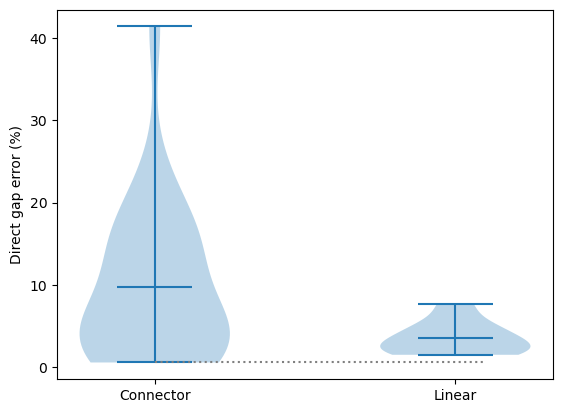

In [18]:
df_g=si_analyse.direct_gaps_data 
vlist= [df_g[df_g["type"]=="con"]["Relative error (%)"],
        df_g[df_g["type"]=="lin"]["Relative error (%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Direct gap error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(df_g[df_g["type"]=="con"]["Relative error (%)"].min(),1,2.1, color="grey", ls="dotted")

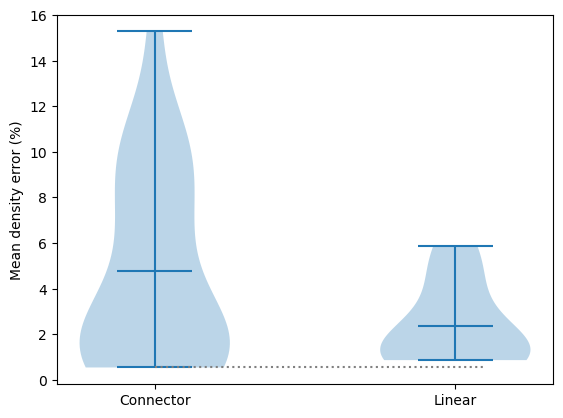

In [19]:
vlist= [si_analyse.dens_vxc_error_data[si_analyse.dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"],
        si_analyse.dens_vxc_error_data[si_analyse.dens_vxc_error_data["type"]=="lin"]["density MeanARE(%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Mean density error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(si_analyse.dens_vxc_error_data[si_analyse.dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"].min(),1,2.1, color="grey", ls="dotted")

# NaCl 

In [78]:
# update results 
! rsync -av --delete ara:/home/me36sin/fxc_conn_article/NaCl/calculations/runs/updated_code/all_tab-con/*con*_v3.npz .
! rsync -av --delete ara:/home/me36sin/fxc_conn_article/NaCl/calculations/runs/updated_code/all_tab-lin/*lin*_v3.npz .

receiving incremental file list
nacl_con5_sc18_v3.npz
nacl_con5_sc3_v3.npz
nacl_con7_sc1_v3.npz
nacl_con8_sc1_v3.npz

sent 113,837 bytes  received 190,178,036 bytes  1,492,485.28 bytes/sec
total size is 1,154,409,632  speedup is 6.07
receiving incremental file list
nacl_lin1_sc3_v3.npz

sent 42,799 bytes  received 41,006,809 bytes  1,391,512.14 bytes/sec
total size is 471,660,256  speedup is 11.49


In [79]:
nacl_analyse = analyzer(mat="nacl", qmc_file="nacl_qmc_dens_vxc.csv")

In [80]:
nacl_analyse.dict["LDA"]= {"dens": np.genfromtxt("dens_PZ81_nacl.dat") , "direct_gap":4.59 , "vxc": np.genfromtxt("vxc_PZ81_nacl.dat"), "residu":0.0  }

In [ ]:
for i in range(1,9):
    for sc in [1,3,18]:  
        try: nacl_analyse.add_to_dict_from_npz(f"nacl_lin{i}_sc{sc}_v3.npz", label=f"lin{i}")
        except : pass
        if i==8 and sc==1 : nacl_analyse.add_to_dict_from_npz(f"nacl_con{i}_sc{sc}.npz", label=f"con{i}_sc{sc}") 
        else : nacl_analyse.add_to_dict_from_npz(f"nacl_con{i}_sc{sc}_v3.npz", label=f"con{i}_sc{sc}") 
        #except: nacl_analyse.add_to_dict_from_npz(f"nacl_con{i}_sc{sc}.npz", label=f"con{i}_sc{sc}")
    

list(nacl_analyse.dict.keys())

## Density error along the route 

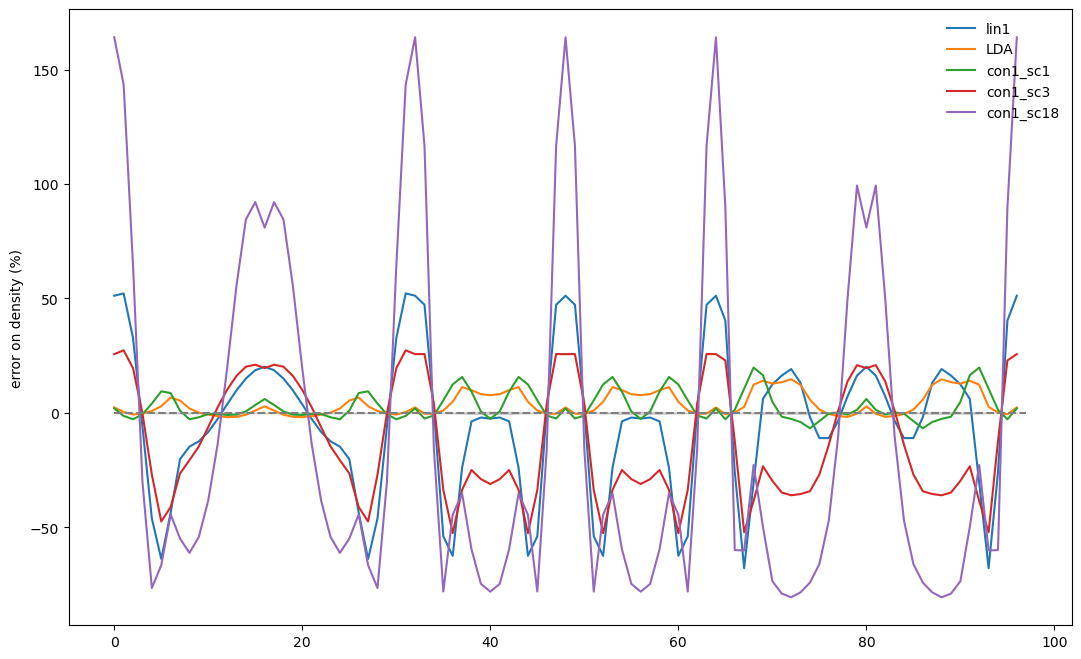

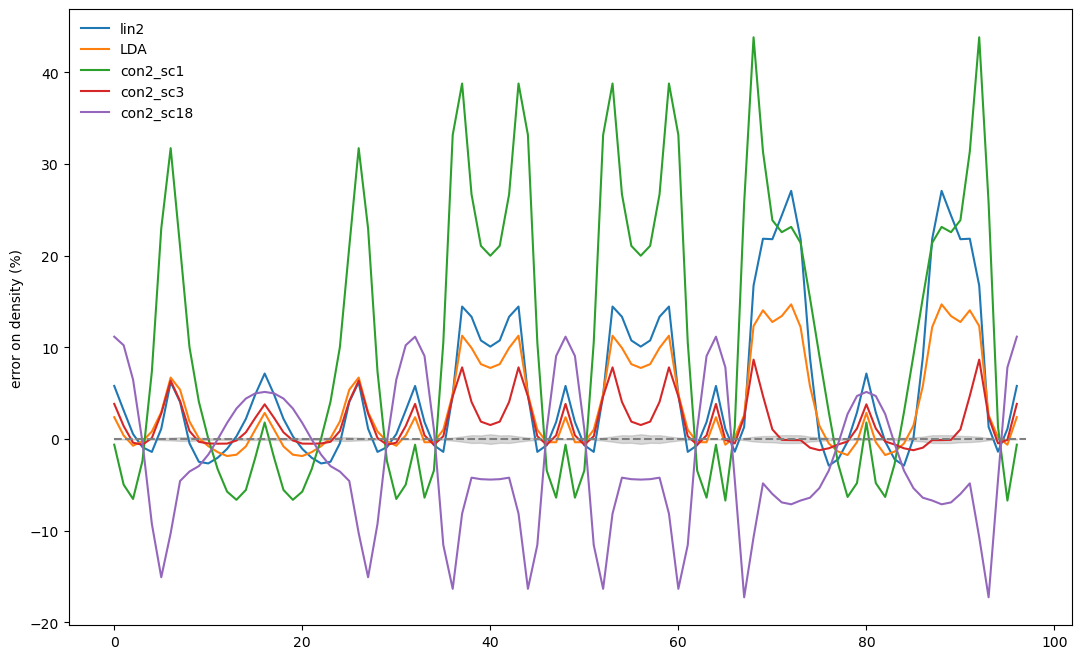

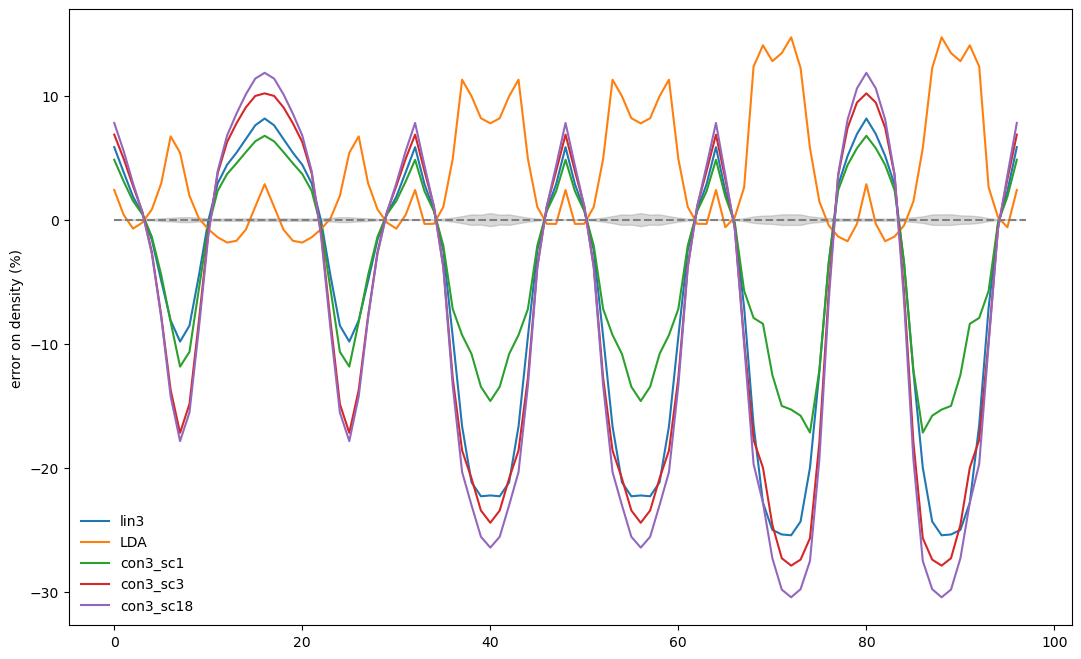

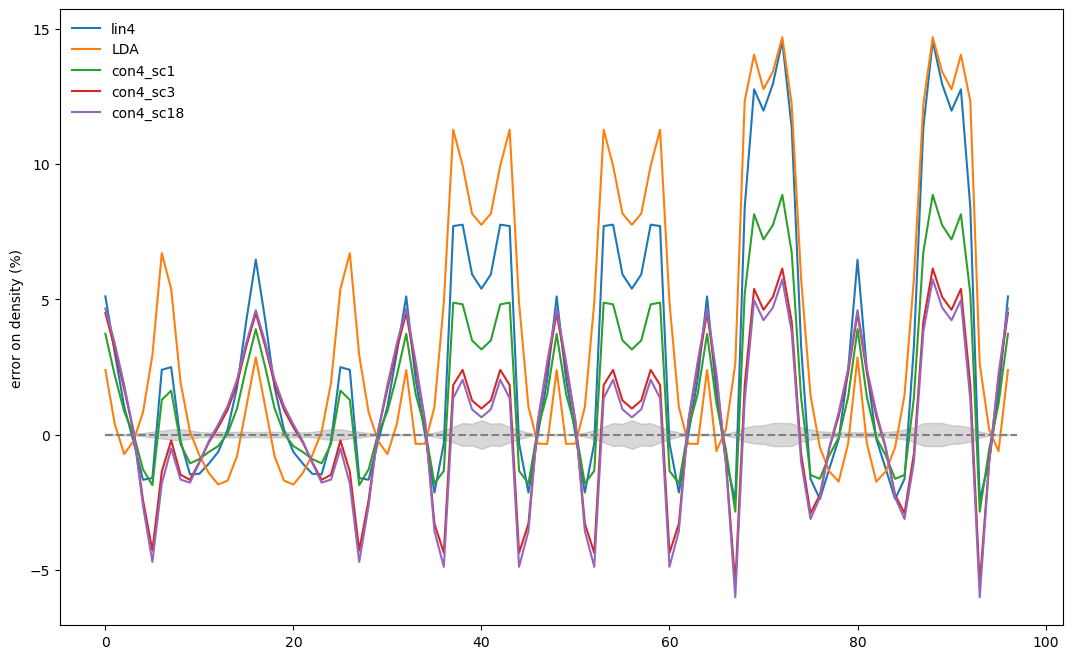

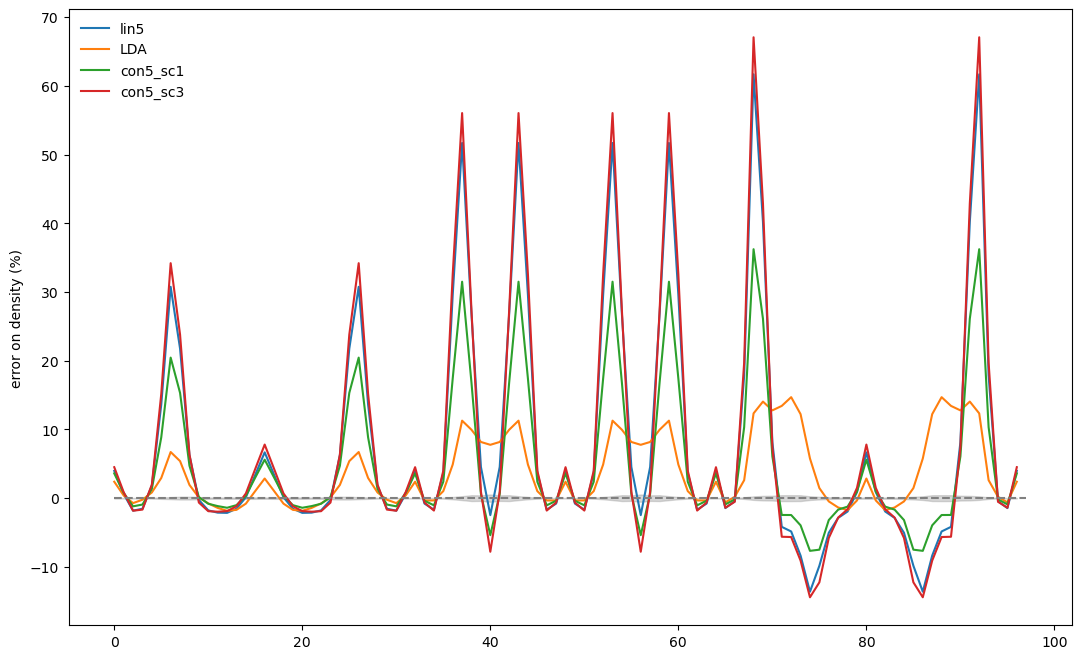

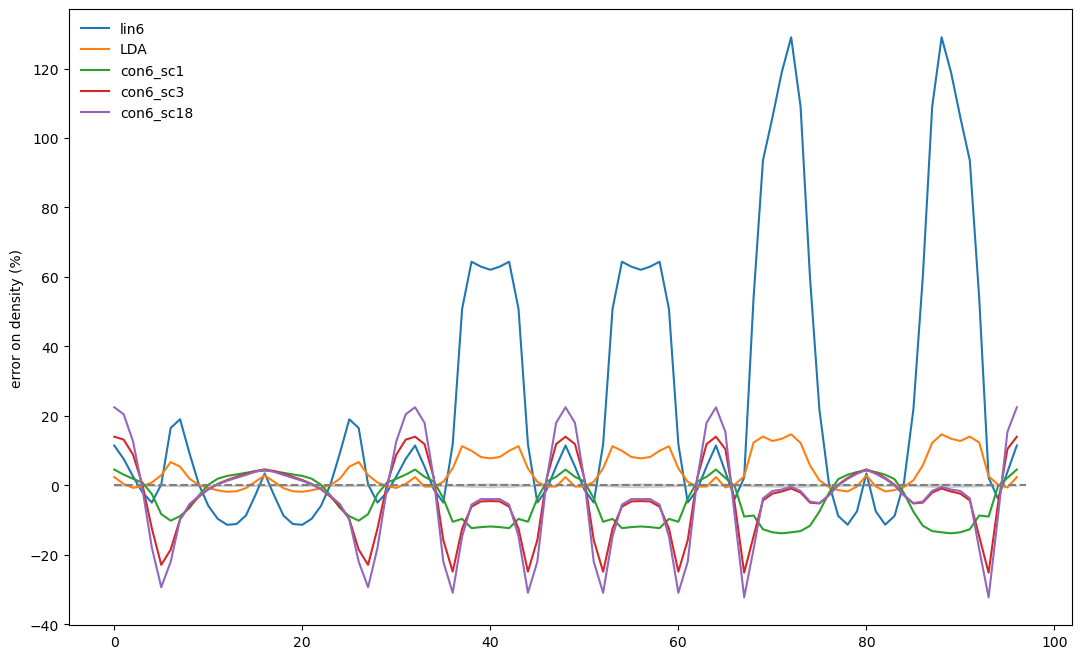

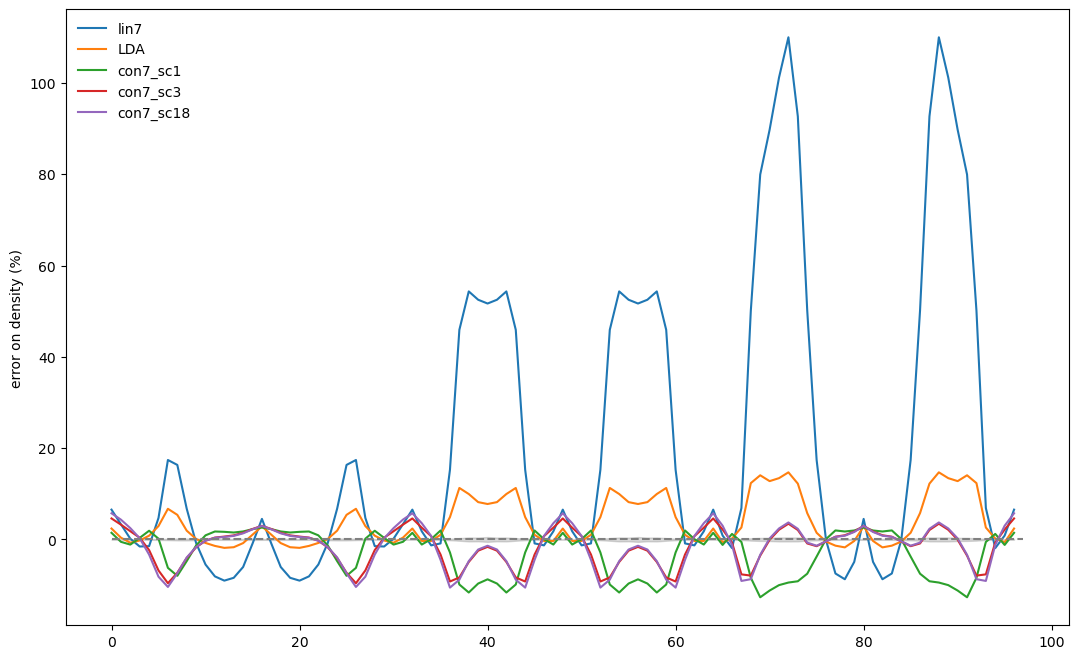

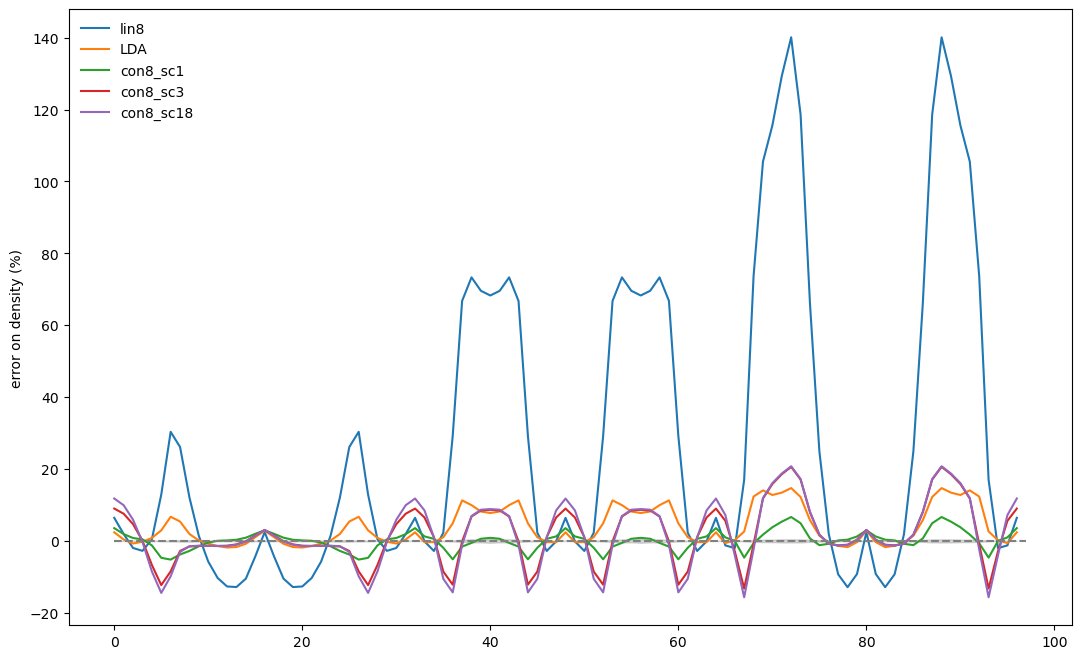

In [117]:
for i in range(1,9):
    plt.figure(figsize=(8*1.618,8))
    if i==5:
        nacl_analyse.plot_diff_with_qmc([f"lin{i}","LDA", f"con{i}_sc1",f"con{i}_sc3"])
    else: 
        nacl_analyse.plot_diff_with_qmc([f"lin{i}","LDA", f"con{i}_sc1",f"con{i}_sc3", f"con{i}_sc18"])

## KS direct gap 

In [122]:
nacl_analyse.get_stat() 
###
##
nacl_analyse.dens_vxc_error_data.loc[:,"type"]= [d[:3] for d in nacl_analyse.dens_vxc_error_data.index ]
nacl_analyse.direct_gaps_data.loc[:,"type"]= [d[:3] for d in nacl_analyse.direct_gaps_data.index ]
###
for key in nacl_analyse.dens_vxc_error_data.index : 
    nacl_analyse.direct_gaps_data.loc[key,"con wins"]= nacl_analyse.con_win(key, criterion="direct_gap") 
    nacl_analyse.direct_gaps_data.loc[key,["n0,r", "nrr'", "nhr_0" ]]= nacl_analyse.con_id(key) 
    nacl_analyse.direct_gaps_data.loc[key,"converged"]= nacl_analyse.dict[key]["residu"] < 1e-5

    #### Same for dens_vxc data ### 
    nacl_analyse.dens_vxc_error_data.loc[key,"con wins"]= nacl_analyse.con_win(key, criterion="density MaxARE(%)") 
    nacl_analyse.dens_vxc_error_data.loc[key,["n0,r", "nrr'", "nhr_0" ]]= nacl_analyse.con_id(key)
    nacl_analyse.dens_vxc_error_data.loc[key,"converged"]= nacl_analyse.dict[key]["residu"] < 1e-6

###
nacl_analyse.direct_gaps_data.sort_values("Relative error (%)")

,Direct KS Gap (ev),Relative error (%),type,con wins,"n0,r",nrr',nhr_0,converged
con3_sc1,5.221974,0.533830,con,True,n(r),(n_av+n(r))/2,n(r),True
con7_sc18,5.299188,0.936920,con,True,n_M,(n(r')+n_M)/2,n_M,True
con7_sc3,5.319707,1.327752,con,True,n_M,(n(r')+n_M)/2,n_M,True
con3_sc18,5.417218,3.185103,con,True,n(r),(n_av+n(r))/2,n(r),True
con8_sc1,5.073026,3.370941,con,True,n_M,n_M,n_M,True
con2_sc18,5.069422,3.439584,con,True,n_av,(n(r')+n_av)/2,n_av,True
con3_sc3,5.447516,3.762211,con,True,n(r),(n_av+n(r))/2,n(r),True
con6_sc3,4.986025,5.028091,con,True,n_M,(n_av+n_M)/2,n_M,True
con6_sc1,5.537811,5.482105,con,True,n_M,(n_av+n_M)/2,n_M,True
con2_sc3,4.928215,6.129245,con,True,n_av,(n(r')+n_av)/2,n_av,True


In [123]:
nacl_analyse.dens_vxc_error_data.sort_values("density MaxARE(%)")

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type,con wins,"n0,r",nrr',nhr_0,converged
con4_sc18,1.905689,6.051039,8.717430,146.965162,con,True,n(r),(n(r')+n(r))/2,n(r),True
con4_sc3,1.879026,6.158212,8.686941,144.427686,con,True,n(r),(n(r')+n(r))/2,n(r),True
con8_sc1,1.575154,6.644084,10.583507,144.376989,con,True,n_M,n_M,n_M,False
con4_sc1,2.257207,8.942148,8.649566,132.125369,con,True,n(r),(n(r')+n(r))/2,n(r),True
con2_sc3,1.967134,9.597978,10.116880,121.541148,con,True,n_av,(n(r')+n_av)/2,n_av,True
con7_sc3,3.076776,10.124087,11.416595,146.473519,con,True,n_M,(n(r')+n_M)/2,n_M,True
con7_sc18,3.172477,11.092671,11.271612,155.703563,con,True,n_M,(n(r')+n_M)/2,n_M,True
con7_sc1,5.608740,13.035911,9.786265,118.198742,con,True,n_M,(n(r')+n_M)/2,n_M,True
con6_sc1,7.789245,13.921649,15.700014,183.254198,con,True,n_M,(n_av+n_M)/2,n_M,True
lin4,3.582074,14.557953,10.782772,152.677787,lin,None,n(r),(n(r')+n(r))/2,n(r),True


Text(0, 0.5, 'direct gap relative error (%)')

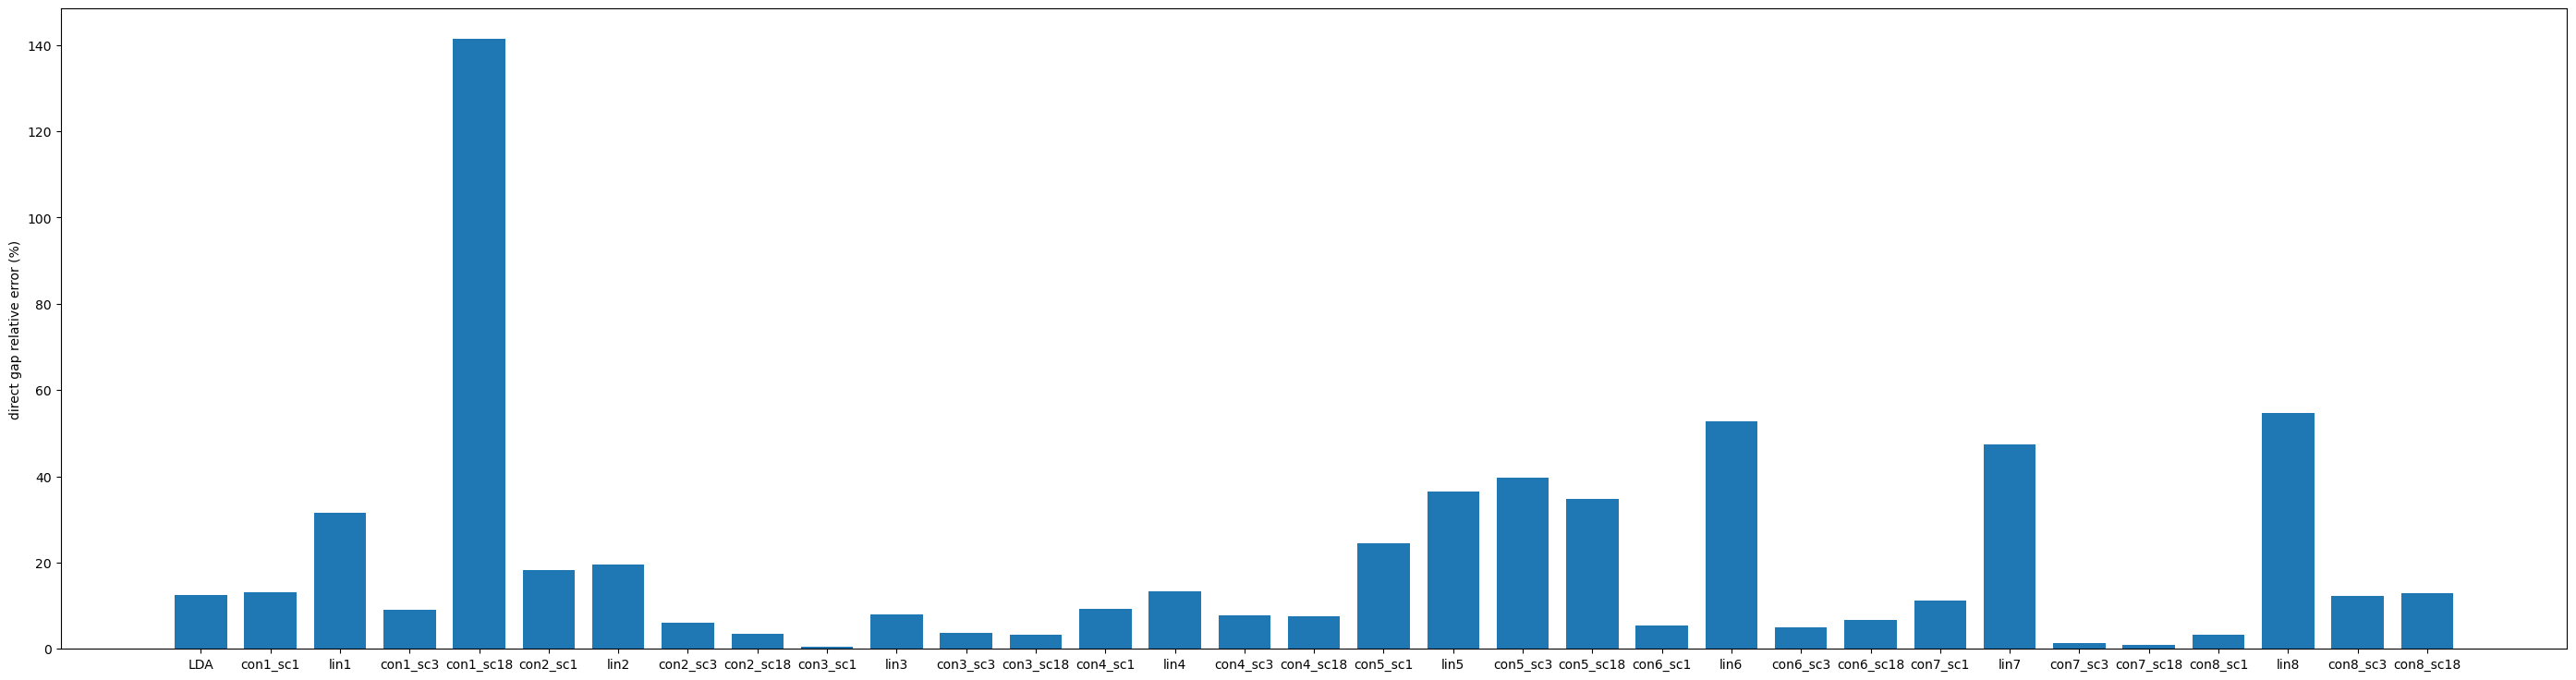

In [124]:
plt.figure(figsize=(35,9))
plt.bar(nacl_analyse.direct_gaps_data.index,nacl_analyse.direct_gaps_data["Relative error (%)"], width=0.75)
plt.ylabel("direct gap relative error (%)")

## Error table 

In [125]:
nacl_analyse.dens_vxc_error_data.sort_values("density MeanARE(%)")

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type,con wins,"n0,r",nrr',nhr_0,converged
con8_sc1,1.575154,6.644084,10.583507,144.376989,con,True,n_M,n_M,n_M,False
con4_sc3,1.879026,6.158212,8.686941,144.427686,con,True,n(r),(n(r')+n(r))/2,n(r),True
con4_sc18,1.905689,6.051039,8.717430,146.965162,con,True,n(r),(n(r')+n(r))/2,n(r),True
con2_sc3,1.967134,9.597978,10.116880,121.541148,con,True,n_av,(n(r')+n_av)/2,n_av,True
con4_sc1,2.257207,8.942148,8.649566,132.125369,con,True,n(r),(n(r')+n(r))/2,n(r),True
con7_sc3,3.076776,10.124087,11.416595,146.473519,con,True,n_M,(n(r')+n_M)/2,n_M,True
con7_sc18,3.172477,11.092671,11.271612,155.703563,con,True,n_M,(n(r')+n_M)/2,n_M,True
lin4,3.582074,14.557953,10.782772,152.677787,lin,None,n(r),(n(r')+n(r))/2,n(r),True
con1_sc1,4.549382,21.894053,25.323327,122.583459,con,True,n_av,n_av,n_av,True
con8_sc3,4.852078,20.601152,18.117601,200.678000,con,True,n_M,n_M,n_M,True


Text(0, 0.5, 'MeanARE(%)')

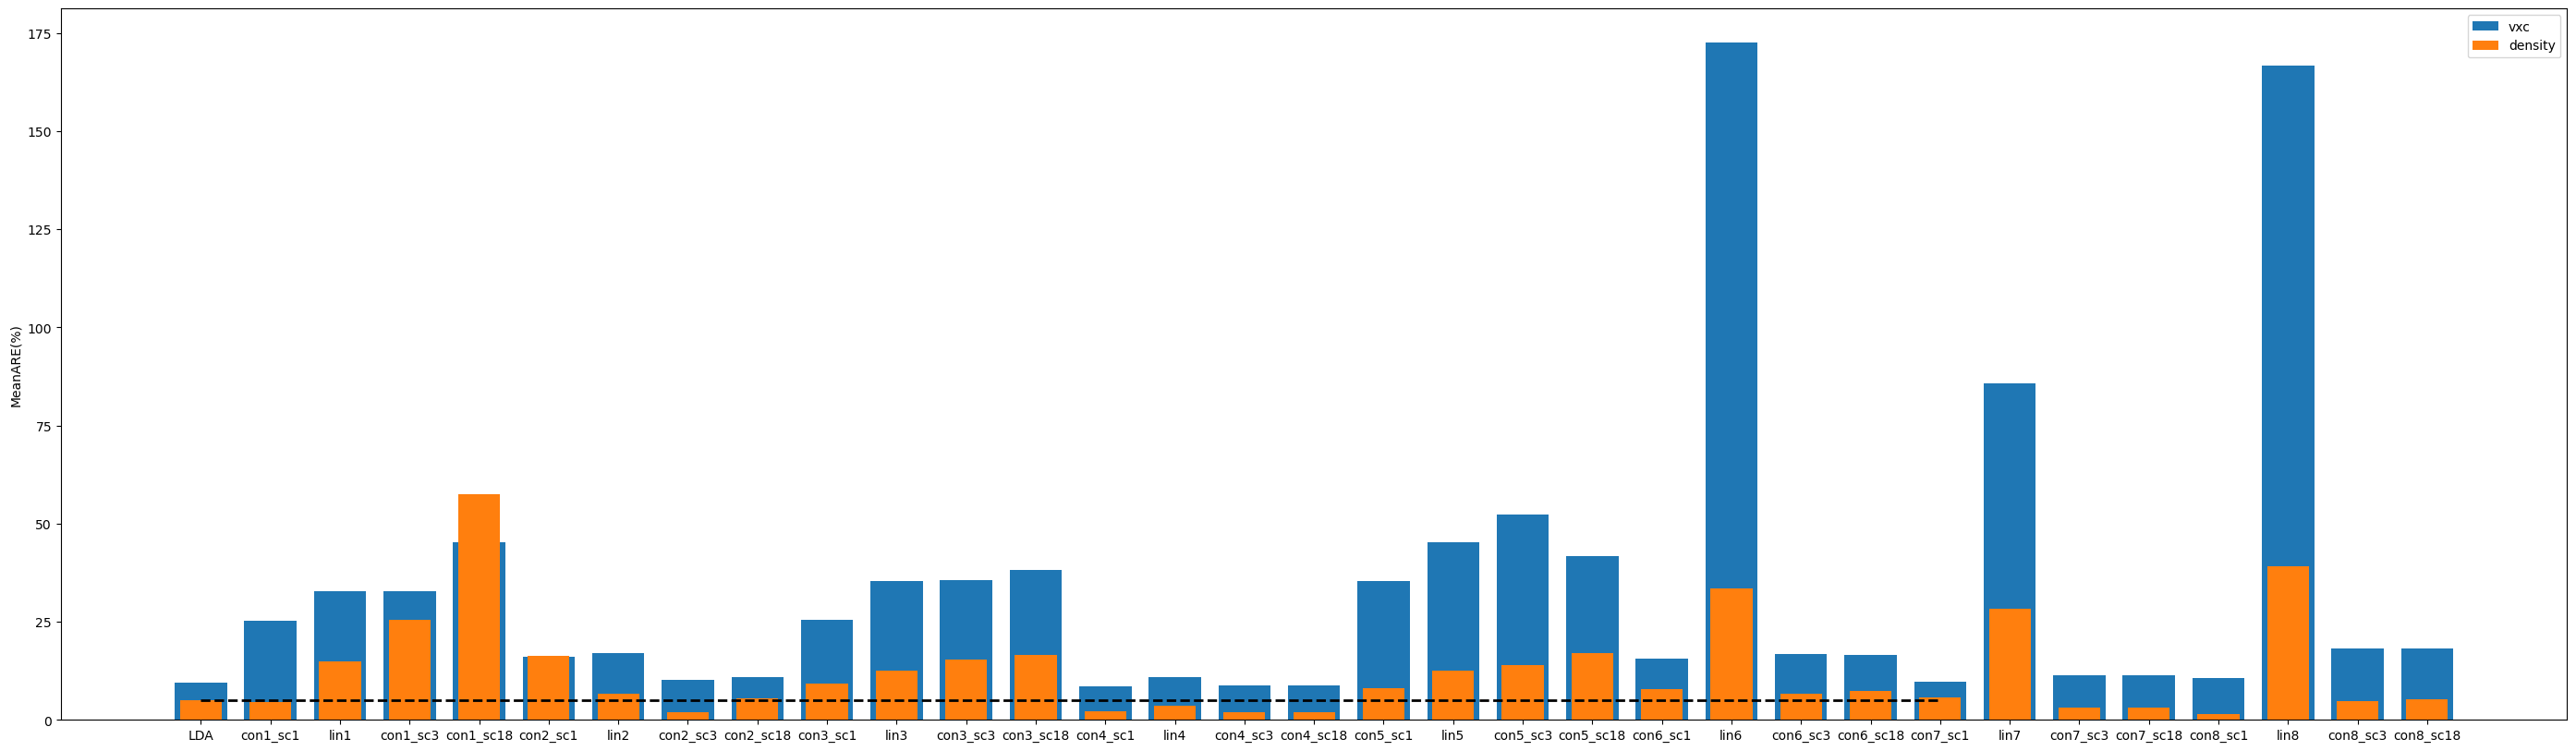

In [126]:
plt.figure(figsize=(35,10))
plt.bar(nacl_analyse.dens_vxc_error_data.index,nacl_analyse.dens_vxc_error_data["vxc MeanARE(%)"], width=0.75, label="vxc")
plt.bar(nacl_analyse.dens_vxc_error_data.index,nacl_analyse.dens_vxc_error_data["density MeanARE(%)"], width=0.6, label="density")
plt.hlines(nacl_analyse.dens_vxc_error_data.loc["LDA","density MeanARE(%)"],0,25, ls="dashed", color="black", lw=2)
plt.legend()
plt.ylabel("MeanARE(%)")

Text(0, 0.5, 'MaxARE(%)')

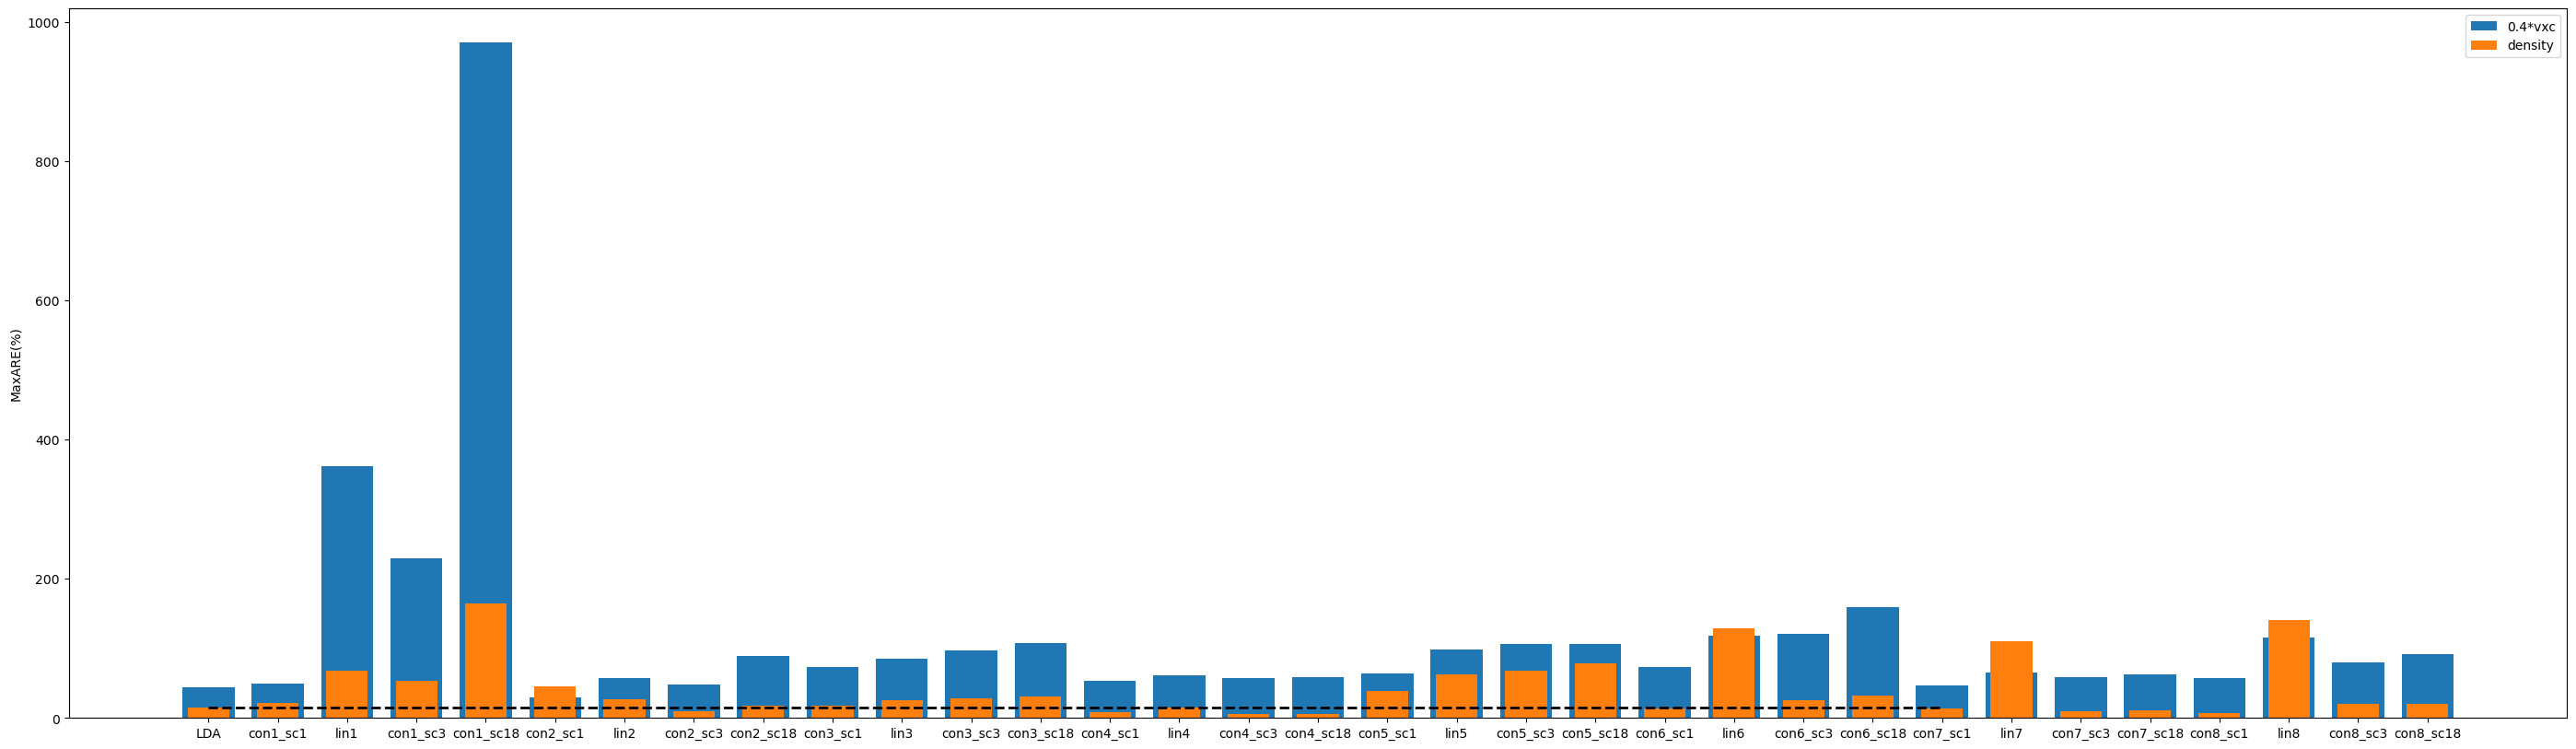

In [127]:
plt.figure(figsize=(35,10))

plt.bar(nacl_analyse.dens_vxc_error_data.index,0.4*nacl_analyse.dens_vxc_error_data["vxc MaxARE(%)"], width=0.75, label="0.4*vxc")
plt.bar(nacl_analyse.dens_vxc_error_data.index,nacl_analyse.dens_vxc_error_data["density MaxARE(%)"], width=0.6, label="density", color="C1")
plt.hlines(nacl_analyse.dens_vxc_error_data.loc["LDA","density MaxARE(%)"],0,25, ls="dashed", color="black", lw=2)

plt.legend()
plt.ylabel("MaxARE(%)")

In [109]:
nacl_analyse.dens_vxc_error_data.sort_values("vxc MaxARE(%)")[:7]

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type,con wins,"n0,r",nrr',nhr_0,converged
con2_sc1,16.247571,44.802064,15.954519,73.144165,con,False,n_av,(n(r')+n_av)/2,n_av,True
LDA,4.951871,15.232345,9.397969,109.908756,LDA,NaN,NaN,NaN,NaN,True
con7_sc1,5.608740,13.035911,9.786265,118.198742,con,True,n_M,(n(r')+n_M)/2,n_M,True
con2_sc3,1.967134,9.597978,10.116880,121.541148,con,True,n_av,(n(r')+n_av)/2,n_av,True
con1_sc1,4.549382,21.894053,25.323327,122.583459,con,True,n_av,n_av,n_av,True
con4_sc1,2.257207,8.942148,8.649566,132.125369,con,True,n(r),(n(r')+n(r))/2,n(r),True
con8_sc1,1.575154,6.644084,10.583507,144.376989,con,True,n_M,n_M,n_M,False


## Map density vxc 

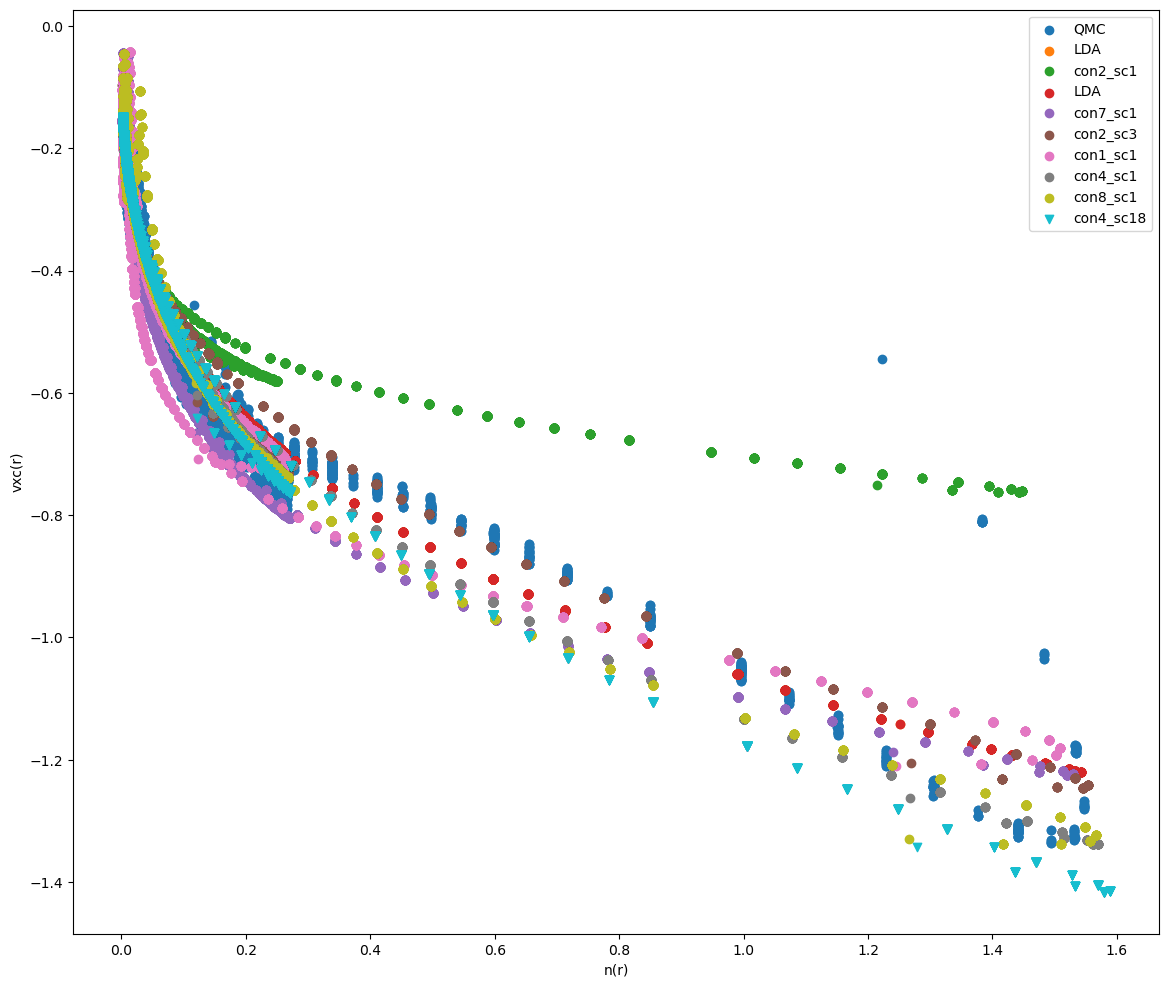

In [128]:
plt.figure(figsize=(12*1.168,12))
plt.scatter(nacl_analyse.newdens_QMC, nacl_analyse.vxc_qmc,label="QMC")
plt.scatter(nacl_analyse.dict["LDA"]["dens"], nacl_analyse.dict["LDA"]["vxc"], label="LDA") 
for func in nacl_analyse.dens_vxc_error_data.sort_values("vxc MaxARE(%)").index[:7]: 
    plt.scatter(nacl_analyse.dict[func]["dens"], nacl_analyse.dict[func]["vxc"], label=func)
    
plt.scatter(nacl_analyse.dict["con4_sc18"]["dens"], nacl_analyse.dict["con4_sc18"]["vxc"], label="con4_sc18", marker="v")
plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.legend()

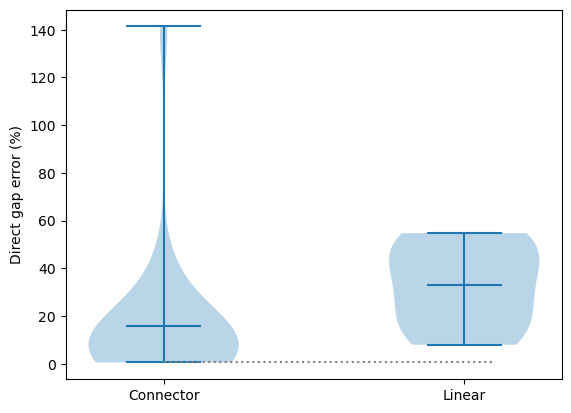

In [129]:
df_g=nacl_analyse.direct_gaps_data 
vlist= [df_g[df_g["type"]=="con"]["Relative error (%)"],
        df_g[df_g["type"]=="lin"]["Relative error (%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Direct gap error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(df_g[df_g["type"]=="con"]["Relative error (%)"].min(),1,2.1, color="grey", ls="dotted")

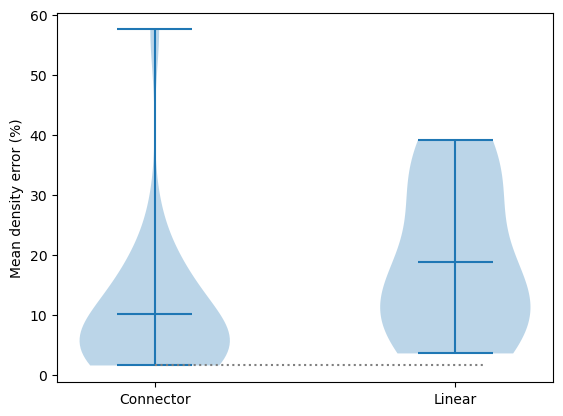

In [130]:
vlist= [nacl_analyse.dens_vxc_error_data[nacl_analyse.dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"],
        nacl_analyse.dens_vxc_error_data[nacl_analyse.dens_vxc_error_data["type"]=="lin"]["density MeanARE(%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Mean density error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(nacl_analyse.dens_vxc_error_data[nacl_analyse.dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"].min(),1,2.1, color="grey", ls="dotted")